# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high)
#size : Output shape: int or tuple of ints, optional
# test size = 150 , actual size 1500, reduces to about 600 unqiue values
lats = np.random.uniform(low=-90.000, high=90.000, size=150)
lngs = np.random.uniform(low=-180.000, high=180.000, size=150)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#cities
cityCount=len(cities)


In [3]:
#Prepare containers (City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed)
rcities=[]
rlats=[]
rlngs=[]
clouds=[]
countries=[]
dates=[]
humidities=[]
mxTemps=[]
winds=[]

In [4]:
### Perform API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"  # not metric
appid = api_key
#query_url = f"{url}appid={api_key}&units={units}&q="+city 
query_url = url+"appid="+api_key+"&units="+units+"&q="

cityCounter=1
for city in cities:
    try:
        city_query_url = query_url+city 
        print(city_query_url)
        response = requests.get(city_query_url).json()
        rcities.append(response['name'])
        rlats.append(response['coord']['lat'])
        rlngs.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        mxTemps.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
        print("Processing Record "+str( cityCounter)+ " of " +str(cityCount)+" | " + city)
        cityCounter= cityCounter+1
    except:
        print('Skipped '+city)
#print(response)


http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=stepnyak
Processing Record 1 of 119 | stepnyak
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=mataura
Processing Record 2 of 119 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=petropavlivka
Processing Record 3 of 119 | petropavlivka
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=sao filipe
Processing Record 4 of 119 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=ushuaia
Processing Record 5 of 119 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=busselton
Processing Record 6 of 119 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&un

Processing Record 51 of 119 | denpasar
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=anadyr
Processing Record 52 of 119 | anadyr
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=tuatapere
Processing Record 53 of 119 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=batemans bay
Processing Record 54 of 119 | batemans bay
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=farafangana
Processing Record 55 of 119 | farafangana
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=clyde river
Processing Record 56 of 119 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=karauzyak
Skipped karauzyak
http://api.openweathermap.org/data/2.5/weather?appid=8a59

Processing Record 101 of 119 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=mar del plata
Processing Record 102 of 119 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=victoria
Processing Record 103 of 119 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=harur
Processing Record 104 of 119 | harur
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=caravelas
Processing Record 105 of 119 | caravelas
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=konevo
Processing Record 106 of 119 | konevo
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e6e2385d1df09a3af9d9d728&units=Imperial&q=bengkulu
Skipped bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=8a5956e8e

In [5]:
#print(len(rcities), len(countries), len(dates),len(rlats),len(rlngs),len(clouds),len(humidities),len(mxTemps),len(winds))

In [6]:
### Convert Raw Data to DataFrame & save
weather_dict = {
    "City": rcities,
    "Country":countries,
    "Date":dates,
    "Lat": rlats,
    "Long": rlngs,
    "Cloudiness": clouds,
    "Humidity": humidities,
    "Max Temp.":mxTemps,
    "Wind Speed": winds
}

weather_data = pd.DataFrame(weather_dict)
now = datetime.now()

filen="weatherData"+now.strftime("%Y%m%d") +".csv"
weather_data.to_csv(filen)

weather_data.head()

,City,Country,Date,Lat,Long,Cloudiness,Humidity,Max Temp.,Wind Speed
0,Stepnyak,KZ,1544572550,52.83,70.79,8,54,-10.99,3.38
1,Mataura,NZ,1544572394,-46.19,168.86,64,77,64.66,4.72
2,Petropavlivka,UA,1544572550,48.46,36.42,92,95,37.39,13.22
3,Sao Filipe,CV,1544572550,14.90,-24.50,0,92,76.05,15.12
4,Ushuaia,AR,1544569200,-54.81,-68.31,0,53,50.00,13.44


In [7]:
min(weather_data['Max Temp.'])

-51.62

In [8]:
max(weather_data['Max Temp.'])

102.2

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

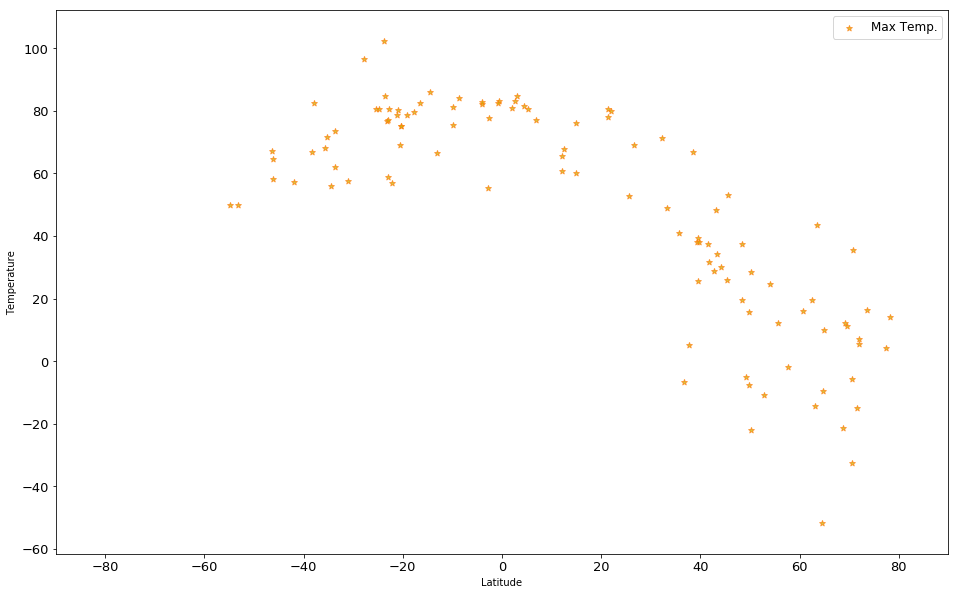

In [12]:
# x: lat , y: temp
x= weather_data['Lat']
y= weather_data['Max Temp.']
plt.figure(figsize=(16, 10), dpi= 72, facecolor='w', edgecolor='k')

plt.scatter(x,y, marker='*', facecolors='y' ,edgecolors='tab:orange',  alpha=0.75)
#gca=get current axis
plt.gca().set(xlim=(-90,90), ylim=(min(weather_data['Max Temp.'])-10,max(weather_data['Max Temp.'])+10), xlabel='Latitude', ylabel='Temperature')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title='Temperature (F) vs. Latitude '
plt.legend(fontsize=12)
plt.show()


#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot